In [2]:
import cv2

In [14]:
import cv2
im = cv2.imread("data/images/img_1.jpg", 0)
print(type(im))

<class 'numpy.ndarray'>


In [19]:
im.shape

(28, 28)

In [22]:
im[:][0]

array([ 3,  0,  0,  3,  7,  3,  0,  3,  0, 11,  0,  0,  3,  0,  0,  3,  8,
        0,  0,  3,  0,  0,  0,  2,  0,  0,  0,  0], dtype=uint8)

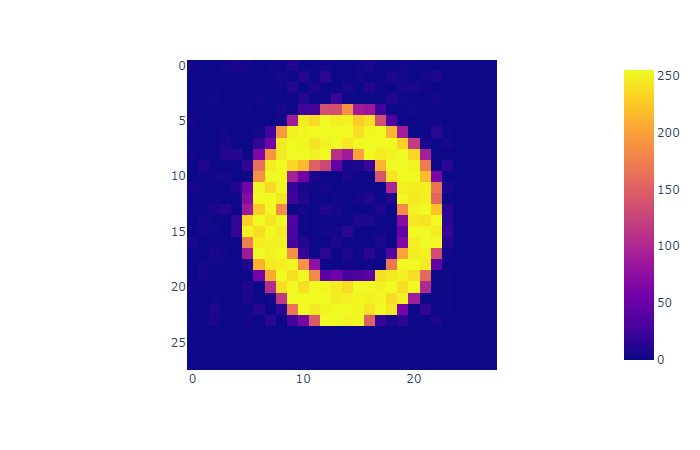

In [24]:
import plotly.express as px
import numpy as np

fig = px.imshow(im)#, color_continuous_scale='gray')
fig.show(renderer = "png")

In [25]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

In [42]:
digits.images.shape

(1797, 8, 8)

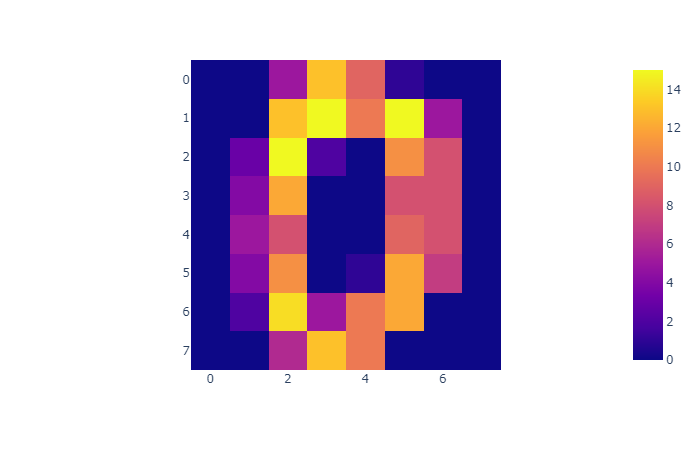

In [41]:
fig = px.imshow(digits.images[0])#, color_continuous_scale='gray')
fig.show(renderer = "png")